# K-Means Clustering
1. K-Means Clustering is an unsupervised machine learning algorithm that partitions data into K clusters based on feature similarity. Each cluster is represented by a centroid, and data points are assigned to the nearest centroid.

2. Algorithm Steps:
    1. Choose k cluster centroids randomly.

    2. Assign each data point to the nearest centroid.

    3. Update centroids by calculating the mean of points in each cluster.

    4. Repeat steps 2–3 until:

    5. Centroids do not change (convergence), or

       A maximum number of iterations is reached.

# K-Means Clustering Algorithms Implementation

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.datasets import make_blobs

In [16]:
# Generate a dataset with 3 clusters, 100 samples, and 2 features
X,y = make_blobs(n_samples=1000,centers=3, n_features=2,random_state=23) # here we take y but we don't need in unsupervised Algo

In [18]:
X.shape

(1000, 2)

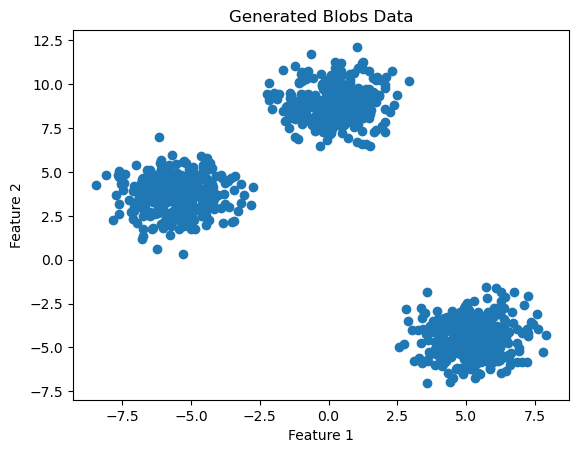

In [22]:
# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1])
plt.title("Generated Blobs Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [28]:
# now Train Test Split
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)  # we only use x data(x_train,X_test)

In [30]:
from sklearn.cluster import KMeans

In [36]:
## Now find the K valuse
# Step 1: In manual way 
# Elbow Method to select the K value

wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [38]:
wcss

[41167.28340753901,
 9544.872623190913,
 1570.3723999827837,
 1356.5945869634127,
 1194.5018409610082,
 1132.86368704708,
 907.9788707454411,
 809.2797710605496,
 703.8910255851952,
 661.3424877177326]

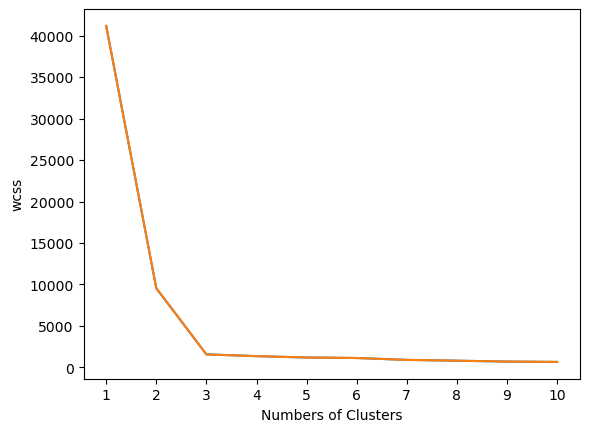

In [42]:
## plot Elbow Curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Numbers of Clusters')
plt.ylabel('wcss')
plt.show()

 ## What to Look For:
1. Find the "elbow point" where the inertia (WCSS) decreases slowly.

2. That k is a good choice for the number of clusters.

In [44]:
# we find k = 3 so 
kmeans = KMeans(n_clusters = 3,init='k-means++')

In [48]:
y_labels = kmeans.fit_predict(X_train)  # fit_predict use for traing data set 
y_labels

array([0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2,
       0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2,
       0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 2,
       0, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0,
       0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0,
       2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0,
       1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 2,
       1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1,

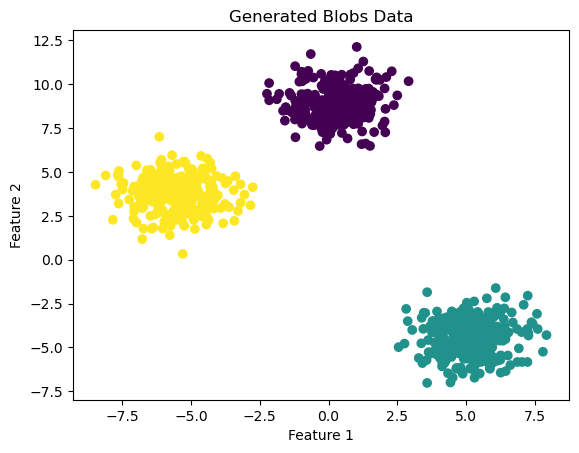

In [54]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_labels)
plt.title("Generated Blobs Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [62]:
# for test dataset
y_test_labels = kmeans.predict(x_test)
y_test_labels

array([0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0,
       1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1,
       1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0,
       0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 1])

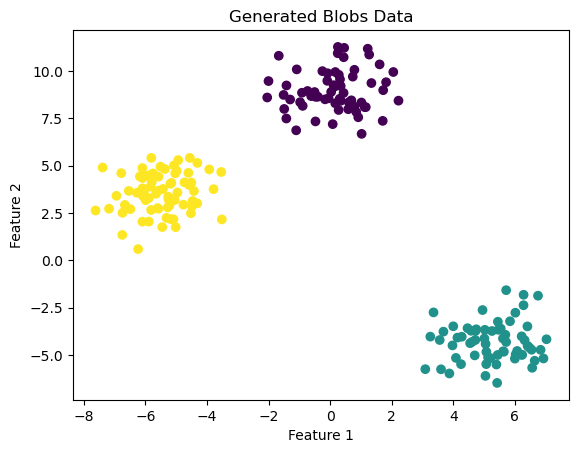

In [64]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test_labels)
plt.title("Generated Blobs Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [68]:
# Now find K value Automate
# kneed Locator
!pip install kneed


In [70]:
from kneed import KneeLocator

In [74]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing') # curve ='convex' beacuse our value is Decreases

kl.elbow  # value of k (number of clusters)

3

In [78]:
# Finaly, we used Silhouette_score in Clustering Algorithms
from sklearn for Performance Metrics.metrics import silhouette_score

In [86]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)
    

In [88]:
silhouette_coefficients

[0.7258310358179207,
 0.8068049253852778,
 0.6396735127715047,
 0.4907066642047198,
 0.3274047686765455,
 0.33981997017329746,
 0.32600468399636884,
 0.3351897537965675,
 0.3375876140199573]

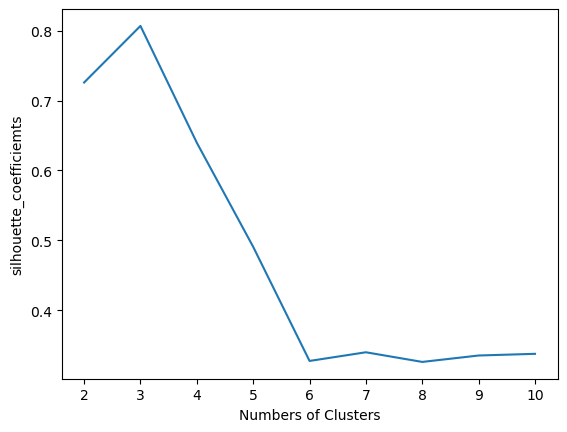

In [100]:
#Plot Silhouette Score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Numbers of Clusters')
plt.ylabel('silhouette_coefficiemts')
plt.show()

C:\Users\VIKRAM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


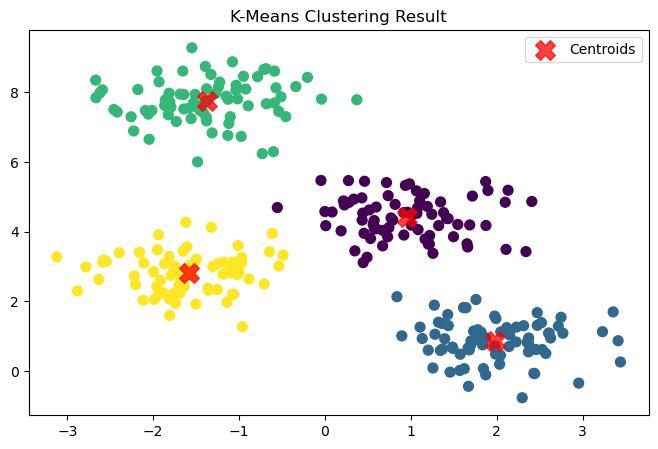

In [109]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Step 4: Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering Result")
plt.legend()
plt.show()


### centers[:, 0], centers[:, 1]
1. centers: It's a NumPy array of shape (k, n_features) that stores the coordinates of the cluster centers (centroids) found by K-Means.

2. centers[:, 0]: All rows, column 0 → x-coordinates of the centroids.

3. centers[:, 1]: All rows, column 1 → y-coordinates of the centroids.

